# An example of using candex to extract data for point data, in this case capitals of the world
## Source netCDF file are ERA5 limited to North American Domain and Caribbean domain

In [38]:
from candex import candex

cndx = candex()  # initialize candex object
cndx.name_of_case              = 'ERA5_capitals_north_america'
cndx.temporary_candex_folder   = '../temporary/'
cndx.name_of_target_shp        = '../data/target_shapefiles/Capitals_point.shp' # all the world capitals
cndx.name_of_nc_files          = '../data/Source_nc_ERA5/ERA5_NA_*.nc' # ERA5 limited to North America and Caribbean
cndx.name_of_var_name          = ['airtemp']
cndx.name_of_var_lon           = 'longitude' 
cndx.name_of_var_lat           = 'latitude'
cndx.name_of_var_time          = 'time'
cndx.name_of_nc_output_folder  = '../output/'
cndx.format_list               =  ['f4']
cndx.fill_value_list           = ['-9999.00']
#cndx.name_of_remap_file        = '../temporary/ERA5_capitals_north_america_remapping.csv'

# execute candex
cndx.run_candex()

candex detects that target shapefile is in WGS84 (epsg:4326)
candex detects that no fields are provided for ID, lat, lon and will assign those by itself
candex detects point(s) as geometry of target shapefile and will apply small buffer to them
candex will save standard shapefile for candex claculation as:
../temporary/ERA5_capitals_north_america_target_shapefile.shp
candex detects that the varibales from the netCDF files are identicalin dimensions of the varibales and latitude and longitude
candex detects that all the varibales have dimensions of:
['time', 'latitude', 'longitude']
candex detects that the longitude varibales has dimensions of:
['longitude']
candex detects that the latitude varibales has dimensions of:
['latitude']
candex detects case 1 - regular lat/lon


/Users/shg096/Desktop/candex_newgen/candex/candex.py:111: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['ID_t']  = np.arange(len(shp))+1
/Users/shg096/Desktop/candex_newgen/candex/candex.py:112: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['lat_t'] = shp.centroid.y # centroid lat from target


candex is creating the shapefile from the netCDF file and saving it here:
../temporary/ERA5_capitals_north_america_source_shapefile.shp
candex decides the netCDF file has longtitude values of -180 to 180; creating the extended
candex saved the expanded shapefile at:
../temporary/ERA5_capitals_north_america_source_shapefile_expanded.shp


/Users/shg096/Desktop/candex_newgen/candex/candex.py:541: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # Caclulating the area for shp1
/Users/shg096/Desktop/candex_newgen/candex/candex.py:545: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # Caclulating the area for shp2
/Users/shg096/Desktop/candex_newgen/candex/candex.py:640: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  nei.append([i,k])
/Users/shg096/Desktop/candex_newgen/candex/candex.py:644: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  pairs['Intersection'] = pairs.apply(lambda x: (x['ge

Remapping ../data/Source_nc_ERA5/ERA5_NA_19790101.nc to ../output/ERA5_capitals_north_america_remapped_1979-01-01-00-00-00.nc
Started at date and time 2021-01-24 21:29:02.933449
Ended   at date and time 2021-01-24 21:29:03.038107
Remapping ../data/Source_nc_ERA5/ERA5_NA_19790102.nc to ../output/ERA5_capitals_north_america_remapped_1979-01-02-00-00-00.nc
Started at date and time 2021-01-24 21:29:03.042481
Ended   at date and time 2021-01-24 21:29:03.133801
Remapping ../data/Source_nc_ERA5/ERA5_NA_19790103.nc to ../output/ERA5_capitals_north_america_remapped_1979-01-03-00-00-00.nc
Started at date and time 2021-01-24 21:29:03.138898
Ended   at date and time 2021-01-24 21:29:03.242510


--------------
--------------
# Visualization of the source and the results

            S_1_name  ID_t      lat_t      lon_t           AS1  IDS1  \
0      Port-of-Spain    13  10.651997 -61.517031  2.000000e-10    13   
1             Roseau    23  15.301016 -61.387013  2.000000e-10    23   
2         Bridgetown    27  13.102003 -59.616527  2.000000e-10    27   
3          Kingstown    29  13.148279 -61.212062  2.000000e-10    29   
4           Castries    30  14.001973 -61.000008  2.000000e-10    30   
5         Basseterre    31  17.302030 -62.717009  2.000000e-10    31   
6     Saint George's    33  12.052633 -61.741643  2.000000e-10    33   
7       Saint John's    35  17.118037 -61.850034  2.000000e-10    35   
8        Tegucigalpa    45  14.103991 -87.219475  2.000000e-10    45   
9         Georgetown    46   6.801974 -58.167029  2.000000e-10    46   
10    Port-au-Prince    48  18.542970 -72.337980  2.000000e-10    48   
11        Paramaribo    50   5.835030 -55.167031  2.000000e-10    50   
12           Managua    54  12.154962 -86.270438  2.000000e-10  

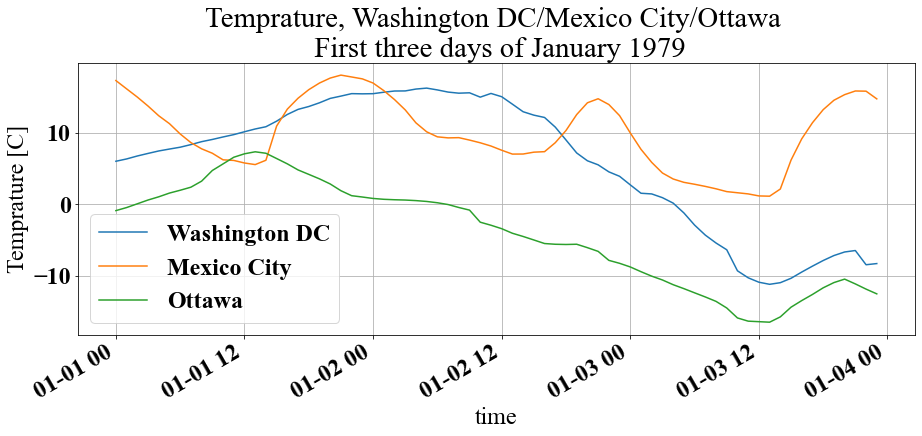

In [39]:
# visualize the result
import geopandas as gpd
import xarray as xr
import glob
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)

shp = gpd.read_file( cndx.temporary_candex_folder + cndx.name_of_case + '_intersected_shapefile.shp')
print(shp)

# the intersected shapefile shows that the ID_t of Washington, D.C., Ottawa and Mexico City is 187, 102 and 192 meaning that
# they corresponse to the ID of 187 and 192 in the original shapefile of the capitals of the world
# many of the capitals are not in the intersection as the ERA5 data is limited to North America and Caribbean


# merge the output file into one xarray dataset
ds = xr.merge([xr.open_dataset(f) for f in sorted(glob.glob(cndx.name_of_nc_output_folder+cndx.name_of_case +'*.nc'))])
print(ds)
ds.airtemp [:,:] = ds.airtemp[:,:] - 273; # Kelvin to Celsius

# extract the data and plotting
fig, axes = plt.subplots(1,1,figsize=(15,5))

WashingtonDC = ds.sel(ID=187, method = 'nearest') # ID_t, the target ID for Washington DC is 187
WashingtonDC.airtemp.plot(ax = axes, label='Washington DC')

MexicoCity = ds.sel(ID=192, method = 'nearest') # ID_t, the target ID for Washington DC is 192
MexicoCity.airtemp.plot(ax = axes, label='Mexico City')

Ottawa = ds.sel(ID=102, method = 'nearest') # ID_t, the target ID for Washington DC is 192
Ottawa.airtemp.plot(ax = axes, label='Ottawa')

plt.grid()
plt.ylabel ('Temprature [C]')
plt.title ('Temprature, Washington DC/Mexico City/Ottawa \n First three days of January 1979')
plt.legend()